In [69]:
### Plot paired simulation noise-biases for thesis chapter 3 using Planck style guides
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Configure Matplotlib options
from setup_matplotlib import *
from matplotlib.ticker import MaxNLocator
!pip install scipy
from scipy.interpolate import interp1d

[  50.  150.  250.  350.  450.  550.  650.  750.  850.  950. 1050. 1150.
 1250. 1350. 1450. 1550. 1650. 1750. 1850. 1950.]


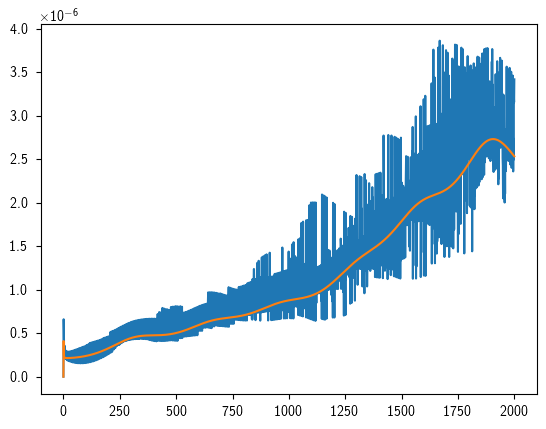

In [71]:
# Read in data from paired simulations

L, N0_equi_paired, N0_equi_err = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/Plots/paper_plots/Paired_sim_data/N0_kappa_noise.txt")
_, N1_equi_paired, N1_equi_err = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/Plots/paper_plots/Paired_sim_data/NONOISE_EQUI_N1_bs_kappa.txt")
_, N1_fold_paired, N1_fold_err = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/Plots/paper_plots/Paired_sim_data/NONOISE_N1_bs_FOLD_kappa.txt")

# Read in numerical results - changed to batch integral

L_N0_num = np.load("/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/N0_numerical_BATCHvegas/L_N0_num.npy")
N0_numerical_equi = np.load("/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/N0_numerical_BATCHvegas/N0_numerical_equi.npy")
L_N0_num = np.array(L_N0_num, dtype=np.float128)
N0_numerical_equi = np.array(N0_numerical_equi, dtype=np.float128)
# Read in Alba's results
L_alba, N0_alba = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/N0_numerical_vegas/alba_n0.txt", unpack = True)

# Print numerical results
# ratio = N0_numerical_equi / N0_alba
# plt.plot(L_N0_num, ratio)
# plt.show()
# plt.loglog(L_alba, N0_alba, label = 'alba')
# plt.loglog(L_N0_num, N0_numerical_equi, label = 'mine')
# plt.legend()
# plt.show()

#Import flatsky normalisation for testing:

flat_norm = np.load("/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/normalisation/flat_sky_norm.npy")
L_flat = np.load("/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/normalisation/L_norm.npy")
print(L)
plt.plot(L_flat, (L_flat*(L_flat+1))**2 / 4 *flat_norm)


# Load old curved sky norm
L_curved, curved_norm = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/normalisation/curved_norm.txt")
plt.plot(L_curved, (L_curved*(L_curved+1))**2 / 4 *curved_norm)



[-2.28023856 -0.38544893 -0.09750219 -0.07130854  0.01190035 -0.01072998
 -0.00981952  0.01135474  0.0414849   0.02687742  0.00949266  0.01981111
  0.00660779  0.00581153  0.00799253  0.01520033  0.016857    0.02481772
  0.01676819  0.01170722]
[-2.28023856 -0.38544893 -0.09750219 -0.07130854  0.01190035 -0.01072998
 -0.00981952  0.01135474  0.0414849   0.02687742  0.00949266  0.01981111
  0.00660779  0.00581153  0.00799253  0.01520033  0.016857    0.02481772
  0.01676819  0.01170722]
[-2.28023856 -0.38544893 -0.09750219 -0.07130854  0.01190035 -0.01072998
 -0.00981952  0.01135474  0.0414849   0.02687742  0.00949266  0.01981111
  0.00660779  0.00581153  0.00799253  0.01520033  0.016857    0.02481772
  0.01676819  0.01170722]


<Figure size 708.662x531.496 with 0 Axes>

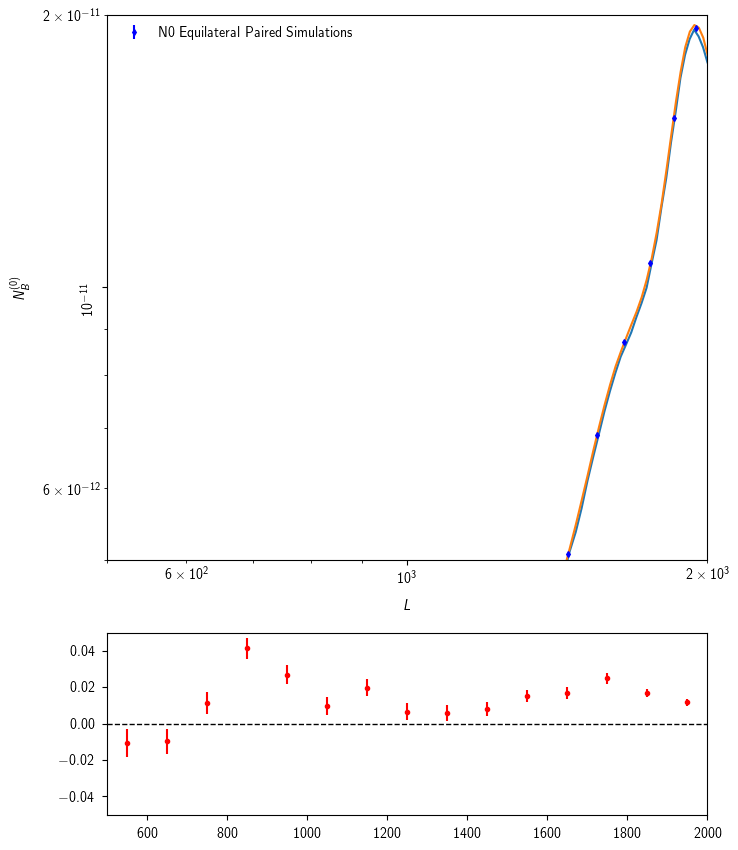

<Figure size 472.441x354.331 with 0 Axes>

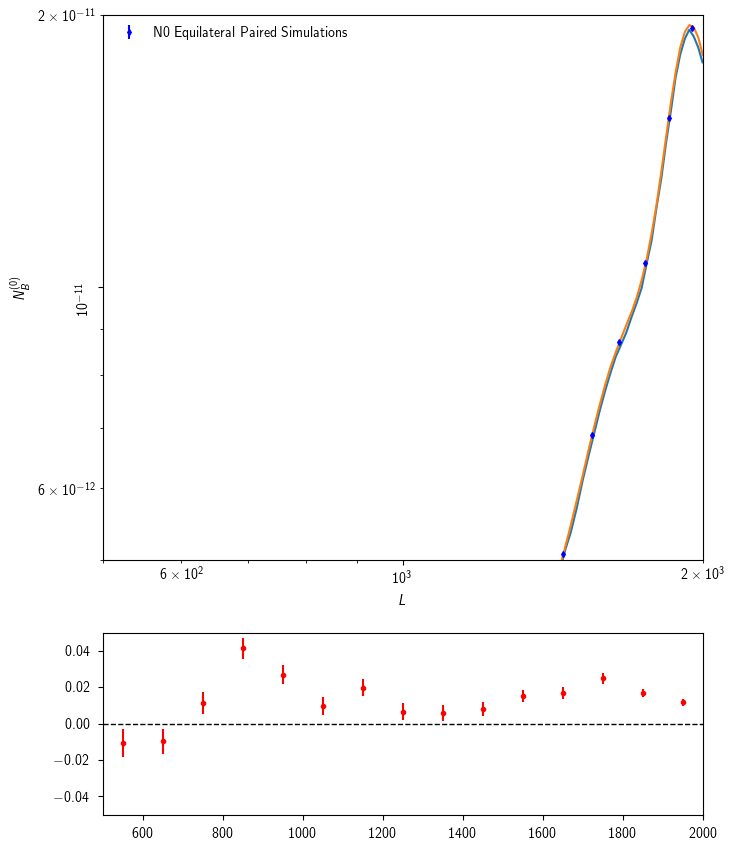

<Figure size 346.457x259.843 with 0 Axes>

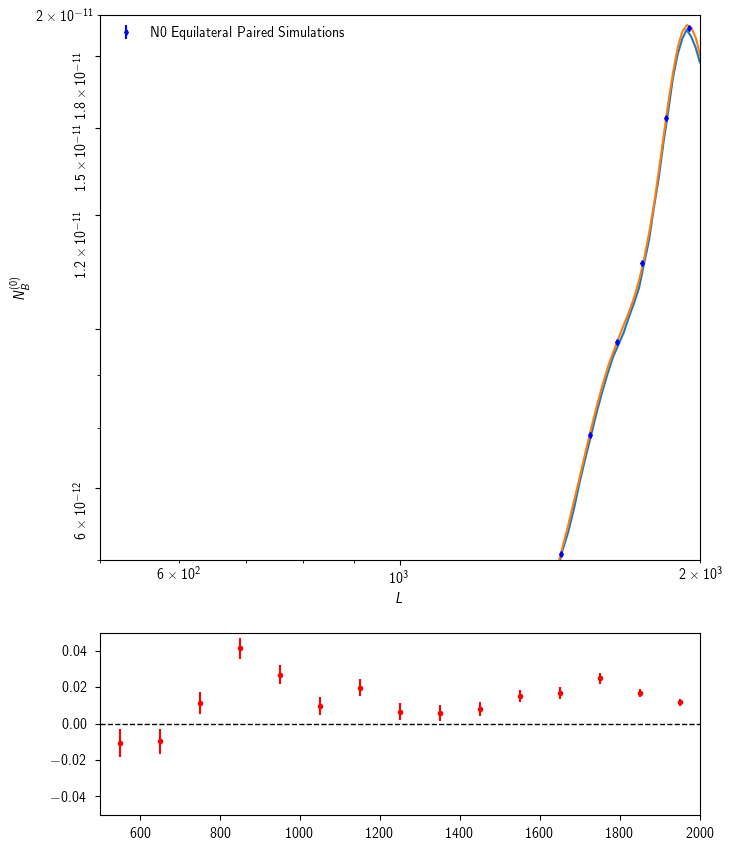

In [68]:
# Make N0 plot

for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    #ax = fig.add_subplot(111)
    interp_function = interp1d(L_N0_num, N0_numerical_equi, kind='linear', fill_value="extrapolate")    
    N0_numerical_atsimpoints = interp_function(L)
    numerical_model = 1/8 * (L * (L + 1))**3 * N0_numerical_atsimpoints
    residual = (N0_equi_paired - numerical_model) / numerical_model
    residual_err = N0_equi_err / numerical_model
    print(residual)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), gridspec_kw={'height_ratios': [3, 1]})
    # equi bispectrum
    ax1.errorbar(L, N0_equi_paired,yerr = N0_equi_err, fmt='bd', label="N0 Equilateral Paired Simulations", markersize=3)
    ax1.plot(L_N0_num, 1/8*(L_N0_num*(L_N0_num +1) )**3 *N0_numerical_equi)
    ax1.plot(L_alba, 1/8* ((L_alba*(L_alba+1))**3 *(N0_alba)))
    ax1.set_xscale('log')
    ax1.set_yscale('log')

    ax2.errorbar(L, residual, yerr=residual_err, fmt='ro', label="Residuals", markersize=3)
    ax2.axhline(0, color='black', linestyle='--', linewidth=1)  # zero line

    # legend
    leg = ax1.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    ax1.set_xlabel(r"$L$"); ax1.set_ylabel(r"$N_B^{(0)}$")
    ax1.yaxis.labelpad = 10*width/17.; ax1.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits
    #plt.ylim(6e-13, 3e-11)
    ax1.set_xlim([500, 2000]) ; ax1.set_ylim([5e-12, 2e-11]) ;ax2.set_xlim([500, 2000]) ; ax2.set_ylim([-0.05, 0.05])

    # reduce white space around figure
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax1.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/paired_sims/N0_equi_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)

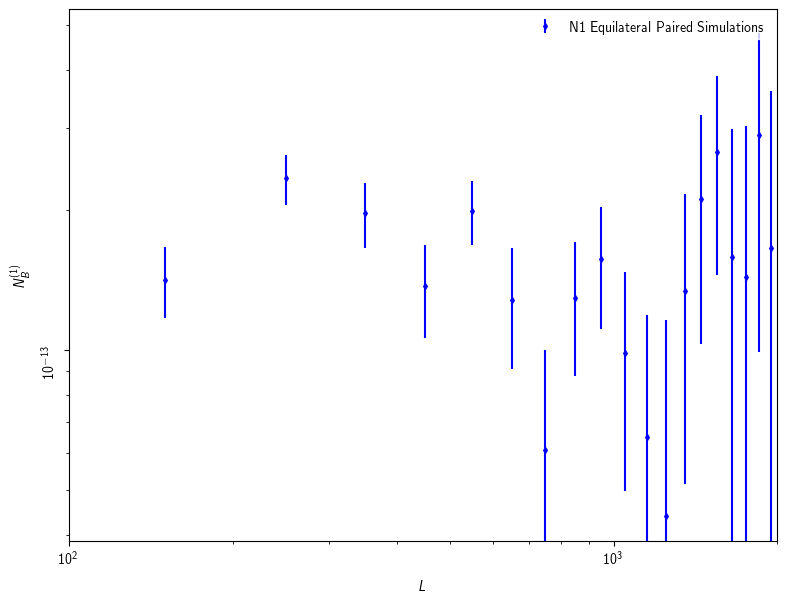

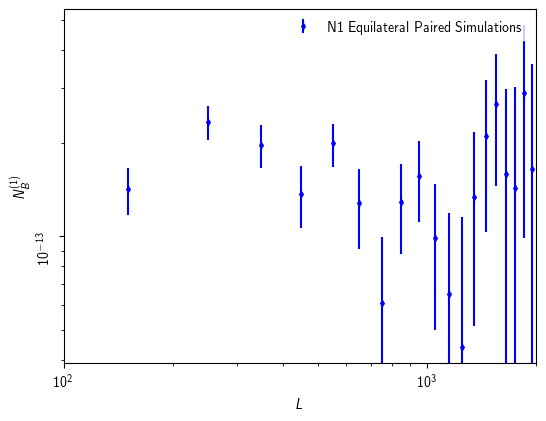

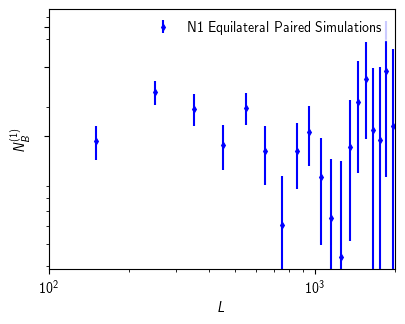

In [66]:
# Make N1 equilateral plots

for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    # equi bispectrum
    plt.errorbar(L, N1_equi_paired,yerr = N1_equi_err, fmt='bd', label="N1 Equilateral Paired Simulations", markersize=3)
    plt.xscale('log')
    plt.yscale('log')
    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"$N_B^{(1)}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits
    #plt.ylim(-4.8e-13, 2.5e-13)
    plt.xlim([100, 2000])

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/paired_sims/N1_equi_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)

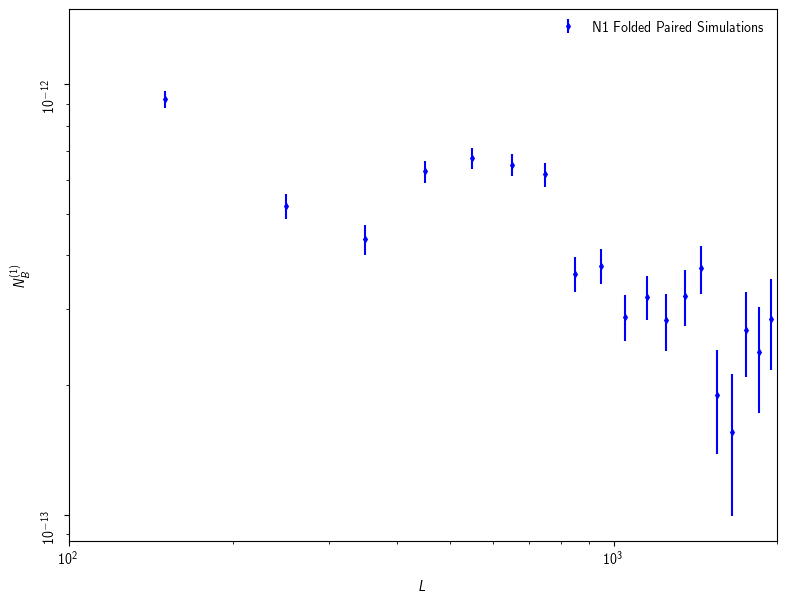

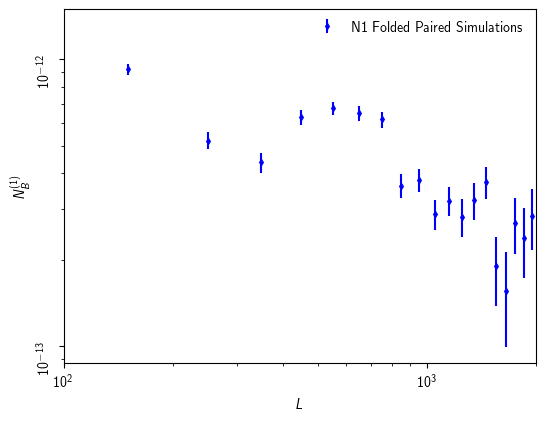

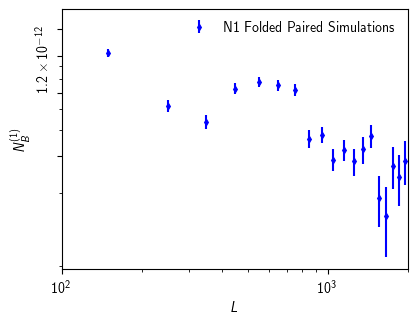

In [67]:
# Make N1 folded plots

for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    # equi bispectrum
    plt.errorbar(L, np.abs(N1_fold_paired),yerr = N1_fold_err, fmt='bd', label="N1 Folded Paired Simulations", markersize=3)
    plt.xscale('log')
    plt.yscale('log')
    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"$N_B^{(1)}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits
    #plt.ylim(-4.8e-13, 2.5e-13)
    plt.xlim([100, 2000])

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/paired_sims/N1_fold_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)